<h1 style="color:blue">Simulation Project Part 3</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
import pandas as pd

In [2]:
sys.setrecursionlimit(10000)

# demand 3

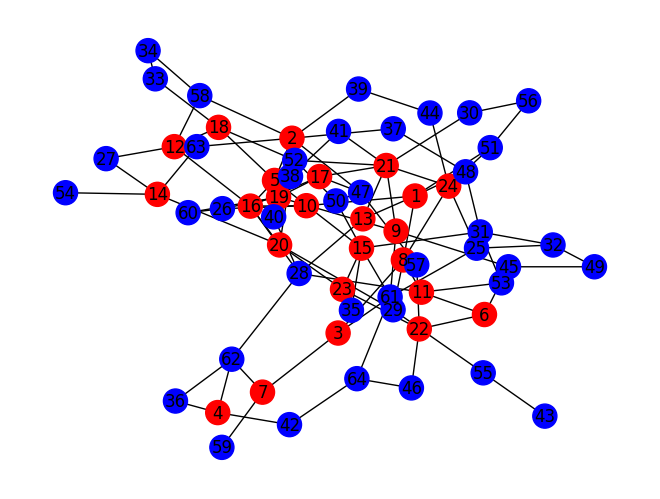

In [3]:
p = 0.5
n = 64
d1 = 10
d2 = 6


rsrg_graph, color_map = gr.RSRG(p, n, d1, d2)    

nx.draw(rsrg_graph, node_color=color_map, with_labels=True)
plt.show()

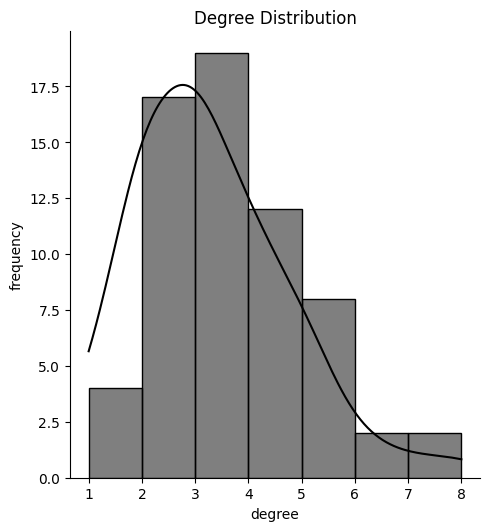

In [4]:
gr.draw_degree_distribution(rsrg_graph)

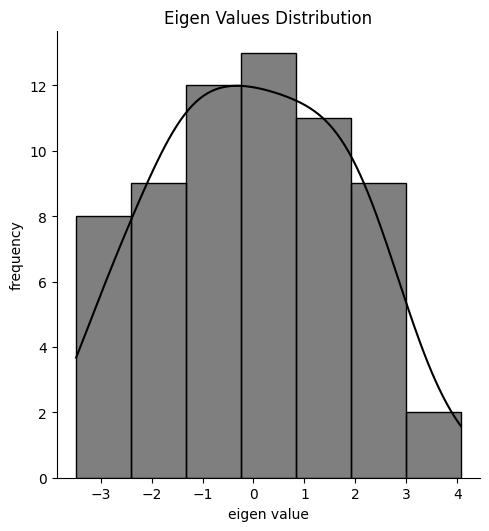

In [5]:
gr.draw_eigen_values_distribution(rsrg_graph)

In [6]:
# create a dataset of RSRG graphs
number_of_simulation = 100
p = 0.9
n = 100
d1 = 10
d2 = 15

spectral_gap = []
algebratic_connectivity = []
natural_connectivity = []
energy = []
laplacian_energy = []
symmetry_ratio = []

rsrg_table = []

for i in range(number_of_simulation):
    rsrg_graph, color_map = gr.RSRG(p, n, d1, d2) 
    sg = gr.spectral_gap(rsrg_graph)
    ac = gr.algebraic_connectivity(rsrg_graph)
    ng = gr.natural_connectivity(rsrg_graph)
    r = gr.symmetry_ratio(rsrg_graph)
    e = gr.energy(rsrg_graph)
    le = gr.laplacian_energy(rsrg_graph)
    
    spectral_gap.append(sg)
    algebratic_connectivity.append(ac)
    energy.append(e)
    laplacian_energy.append(le)
    symmetry_ratio.append(r)
    natural_connectivity.append(ng)
    
    rsrg_table.append([n, d1, d2, p, sg, ac, ng, r, e, le])
    


In [7]:
# create dataframe for rsrg set
cols = ['n', 'd1', 'd2', 'p', 'spectral gap', 'algebratic connectivity', 'natural connectivity', 'r', 'energy', 'laplacian energy']
df = pd.DataFrame(rsrg_table, columns=cols, index=range(1, 101))  
df.head(30)

,n,d1,d2,p,spectral gap,algebratic connectivity,natural connectivity,r,energy,laplacian energy
1,100,10,15,0.9,5.725381,3.786341,6.864482,20.0,271.626915,350.986917
2,100,10,15,0.9,5.434718,4.128580,6.573175,25.0,268.447982,334.103891
3,100,10,15,0.9,5.454499,4.385107,6.676458,25.0,270.959367,330.188646
4,100,10,15,0.9,5.475236,4.291119,6.801395,25.0,272.154984,341.670388
5,100,10,15,0.9,5.715443,4.496174,6.776677,20.0,271.370366,337.079156
6,100,10,15,0.9,5.659308,4.694139,6.929868,25.0,274.399768,347.374235
7,100,10,15,0.9,5.532639,4.505746,6.742691,25.0,272.674826,338.351162
8,100,10,15,0.9,5.586342,4.569270,6.785345,25.0,273.020547,338.195750
9,100,10,15,0.9,5.892182,4.396544,7.035071,25.0,273.566355,349.020927
10,100,10,15,0.9,5.589920,4.675870,6.867304,25.0,272.576999,341.941533


In [8]:
df.mean(0)

n                          100.000000
d1                          10.000000
d2                          15.000000
p                            0.900000
spectral gap                 5.512479
algebratic connectivity      4.389247
natural connectivity         6.791626
r                           23.900000
energy                     271.424678
laplacian energy           342.702836
dtype: float64

# Spectral Gap

mean is 5.5124786368639995
standard deviation is 0.20302765128676195
CI is (5.472685217211795, 5.5522720565162045)


(5.5124786368639995,
 0.20302765128676195,
 0.03979341965220534,
 (5.472685217211795, 5.5522720565162045))

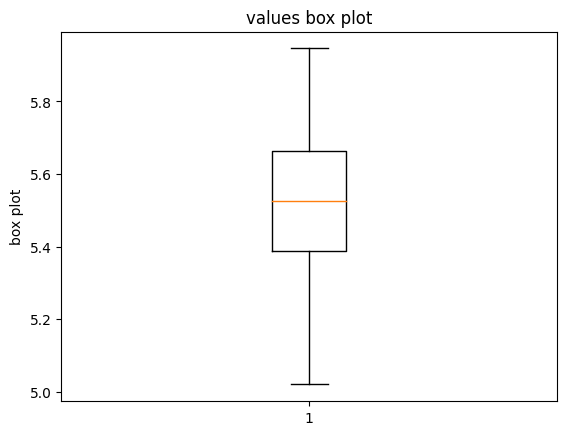

In [9]:
gr.calculate_statistics_parameters(spectral_gap)   

# Algebratic Connectivity

mean is 4.389246827954
standard deviation is 0.22912179117906878
CI is (4.344338956882902, 4.434154699025097)


(4.389246827954,
 0.22912179117906878,
 0.04490787107109748,
 (4.344338956882902, 4.434154699025097))

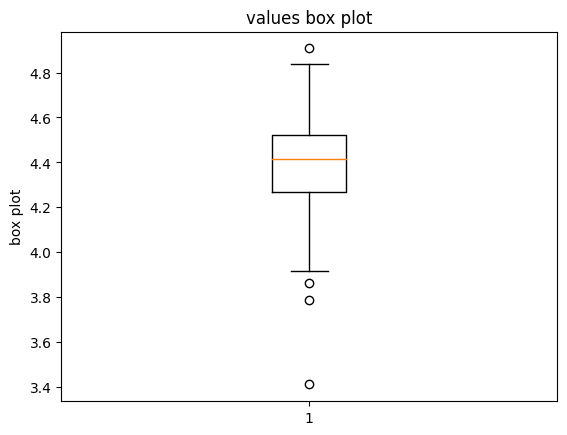

In [10]:
gr.calculate_statistics_parameters(algebratic_connectivity)

# Natural Connectivity

mean is 6.791625527576
standard deviation is 0.14421050987707743
CI is (6.763360267640093, 6.819890787511906)


(6.791625527576,
 0.14421050987707743,
 0.028265259935907172,
 (6.763360267640093, 6.819890787511906))

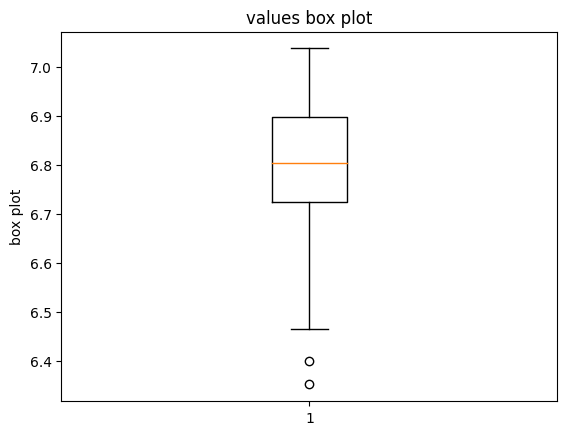

In [11]:
gr.calculate_statistics_parameters(natural_connectivity)

# Energy

mean is 271.42467791392
standard deviation is 1.7946035467320294
CI is (271.07293561876054, 271.77642020907945)


(271.42467791392,
 1.7946035467320294,
 0.35174229515947775,
 (271.07293561876054, 271.77642020907945))

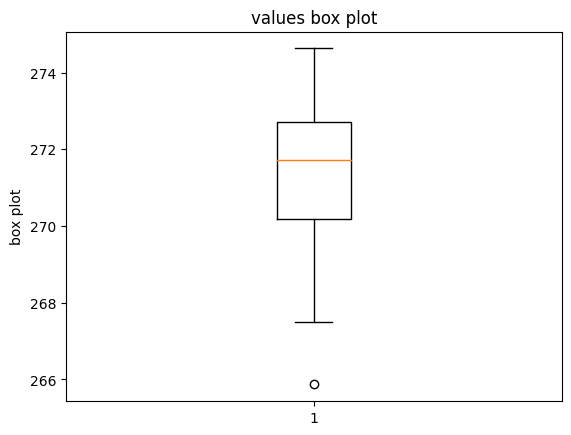

In [12]:
gr.calculate_statistics_parameters(energy)

# Laplacian Energy

mean is 342.7028364632769
standard deviation is 6.315575795372459
CI is (341.46498360738394, 343.9406893191699)


(342.7028364632769,
 6.315575795372459,
 1.237852855893002,
 (341.46498360738394, 343.9406893191699))

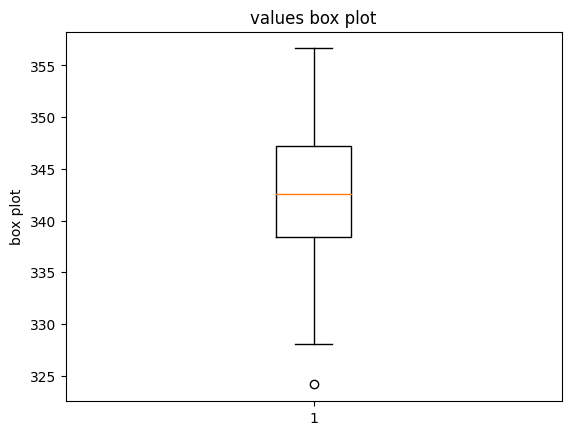

In [13]:
gr.calculate_statistics_parameters(laplacian_energy)

# Symmetry Ratio

mean is 23.9
standard deviation is 2.071231517720798
CI is (23.494038622526723, 24.305961377473274)


(23.9,
 2.071231517720798,
 0.4059613774732764,
 (23.494038622526723, 24.305961377473274))

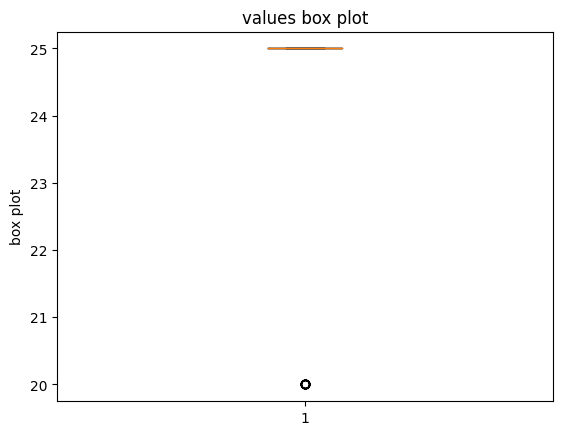

In [14]:
gr.calculate_statistics_parameters(symmetry_ratio)

# Compare RSRG, RSRBG, ER
we consider graphs with same n, p, d

In [15]:
number_of_simulation = 100
n = 120
p = 0.5
d1 = 15
d2 = 25

er_graphs = [] # ER graph dataset
rsrg_graphs = [] # RSRG graph dataset
rsrbg_graphs = [] # RSRBG graph

for i in range(number_of_simulation):
    er_graphs.append(nx.gnp_random_graph(n, p))
    rsrg_graphs.append(gr.RSRG(p, n, d1, d2))
    rsrbg_graphs.append(gr.RSRBG(n, d1, d2))

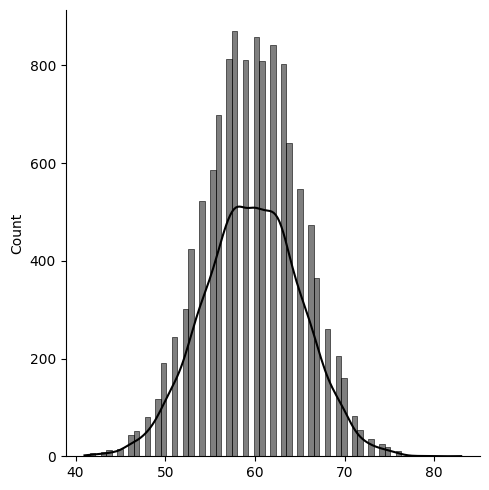

In [16]:
er_degrees = []
for er in er_graphs:
    degrees = [d for n, d in er.degree()]
    er_degrees += degrees
    
sns.displot(er_degrees, kde=True, color="black")

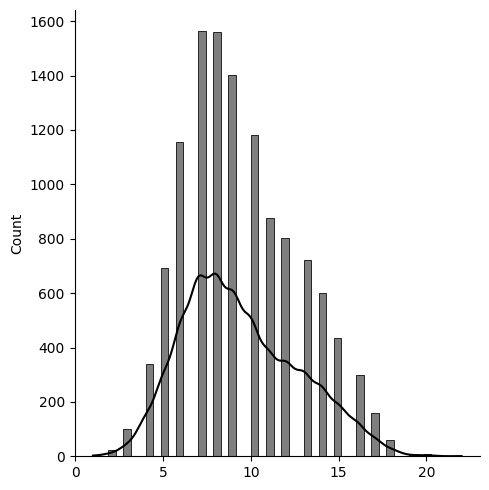

In [17]:
# sample for 100 rsrg graph
rsrg_degrees = []
for rsrg in rsrg_graphs:
    degrees = [d for n, d in rsrg[0].degree()]
    rsrg_degrees += degrees

sns.displot(rsrg_degrees, kde=True, color="black")    

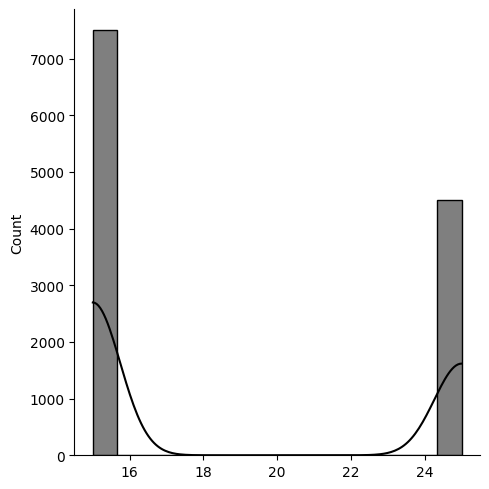

In [18]:
# rsrbg degree
rsrbg_degrees = []
for rsrbg in rsrbg_graphs:
    degrees = [d for n, d in rsrbg[0].degree()]
    rsrbg_degrees += degrees

sns.displot(rsrbg_degrees, kde=True, color="black")  

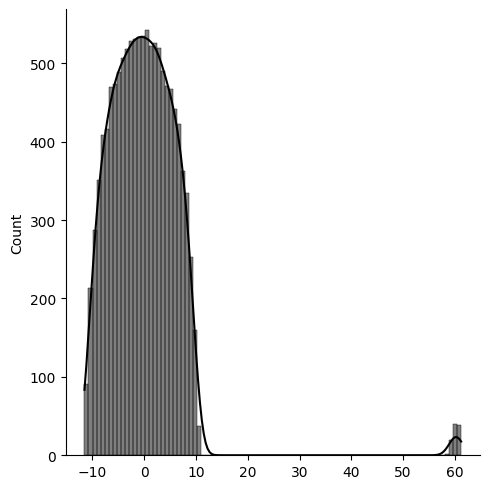

In [19]:
er_eigen_vals = []
for er in er_graphs:
    er_eigen_vals += list(gr.adjacency_eigen_values(er))
    
sns.displot(er_eigen_vals, kde=True, color="black")

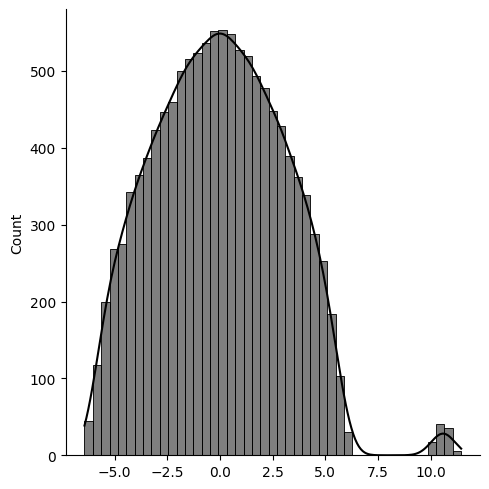

In [20]:
rsrg_eigen_vals = []

for rsrg in rsrg_graphs:
    rsrg_eigen_vals += list(gr.complex_abs(gr.adjacency_eigen_values(rsrg[0])))
    
sns.displot(rsrg_eigen_vals, kde=True, color="black")

# rsrbg eigen values

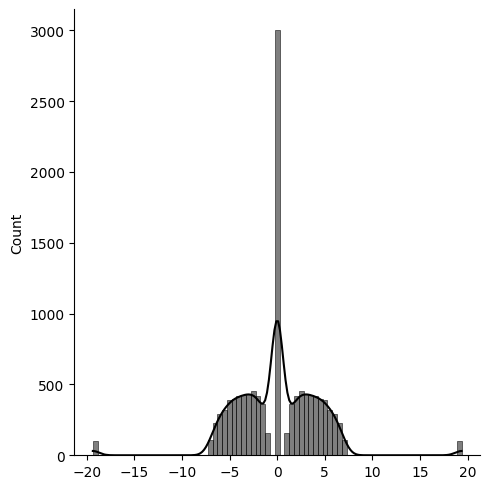

In [21]:
rsrbg_eigen_vals = []

for rsrbg in rsrbg_graphs:
    rsrbg_eigen_vals += list(gr.complex_abs(gr.adjacency_eigen_values(rsrbg[0])))
    
sns.displot(rsrbg_eigen_vals, kde=True, color="black")

# Algebratic Connectivity Distribution

In [27]:
number_of_simulation = 100

n = 500
p = 0.9
d1 = 4
d2 = 16


rsrg_graphs = []
for _ in range(number_of_simulation):
    rsrg = gr.RSRG(p, n, d1, d2)[0]
    rsrg_graphs.append(rsrg)   

mean is 0.614260561431
standard deviation is 0.19740751132287707
CI is (0.5755686892117161, 0.652952433650284)


(0.614260561431,
 0.19740751132287707,
 0.0386918722192839,
 (0.5755686892117161, 0.652952433650284))

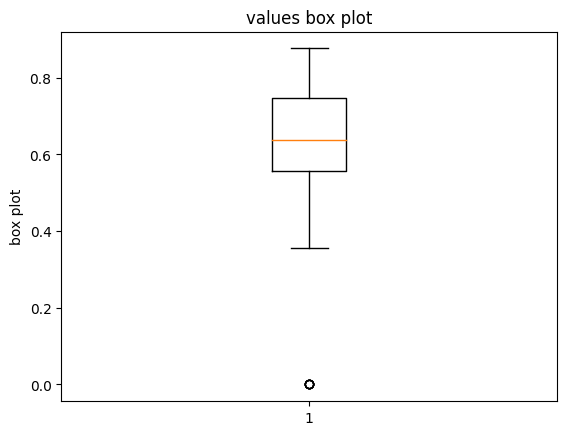

In [30]:
algebtatic_connectivity = []
for rsrg in rsrg_graphs:
    al = gr.algebraic_connectivity(rsrg)
    algebtatic_connectivity.append(al)

gr.calculate_statistics_parameters(algebtatic_connectivity)

Text(0.5, 1.0, 'algebtatic_connectivity Distribution')

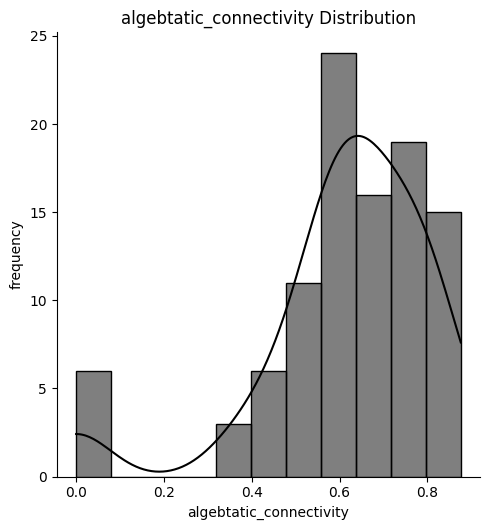

In [31]:
sns.displot(algebtatic_connectivity, kde=True, color="black")
plt.xlabel('algebtatic_connectivity')
plt.ylabel("frequency")
plt.title(f"algebtatic_connectivity Distribution")

# Algebratic Connectivity PDF

In [99]:
# number of nodes
n = 480

# probability
p = np.array(np.arange(0, 1.0001, 0.03125))

# degrees
average_degree = 10 + 4 * p # 2 + 4p

# find d1, d2 with limit 100
limit = 100

d = []

for i in range(len(p)):
    for d1 in range(2, limit):
        for d2 in range(2, limit):
            if (1-p[i]) * d1 + p[i] * d2 == average_degree[i] and (n % (d1 + d2)) == 0:
                d.append((d1, d2))
                break
        else:
            continue
        break   

print(p, end='\n\n')
print(average_degree, end='\n\n')
print(d, end='\n\n')


[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.     ]
[10.    10.125 10.25  10.375 10.5   10.625 10.75  10.875 11.    11.125
 11.25  11.375 11.5   11.625 11.75  11.875 12.    12.125 12.25  12.375
 12.5   12.625 12.75  12.875 13.    13.125 13.25  13.375 13.5   13.625
 13.75  13.875 14.   ]
[(10, 2), (10, 14), (6, 74), (10, 14), (4, 56), (10, 14), (10, 14), (10, 14), (2, 38), (10, 14), (5, 25), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (2, 22), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (4, 16), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (10, 14), (2, 14)]


In [ ]:
# simulation size
number_of_simulation = 100

# number of nodes
n = 480

# algebratic connectivities
table = []

for i in range(len(p)):
    prob = p[i]
    d1 = d[i][0]
    d2 = d[i][1]
    print(p, d1, d2)
    
    rsrg_graphs = []
    ac = []
    for _ in range(number_of_simulation):
        
        rsrg = gr.RSRG(prob, n, d1, d2)[0]

        ac.append(gr.algebraic_connectivity(rsrg))
        rsrg_graphs.append(rsrg)

    table.append([n, d1, d2, prob, np.mean(ac)])

[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.     ] 10 2
[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.     ] 10 14
[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.     ] 6 74
[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.718

In [87]:
rsrg_df = pd.DataFrame(table, columns = ['n', 'd1', 'd2', 'p', 'algebratic connectivity'])
rsrg_df

,n,d1,d2,p,algebratic connectivity
0,480,5,55,0.125,0.000000
1,480,5,35,0.250,0.000000
2,480,7,25,0.375,0.000000
3,480,2,28,0.500,0.000000
4,480,10,20,0.625,1.357670
5,480,10,20,0.750,2.438397
6,480,3,21,0.875,0.096485
7,480,4,20,1.000,1.193288


In statistics, a multimodal distribution is a probability distribution with more than one mode.

Text(0.5, 0, 'p')

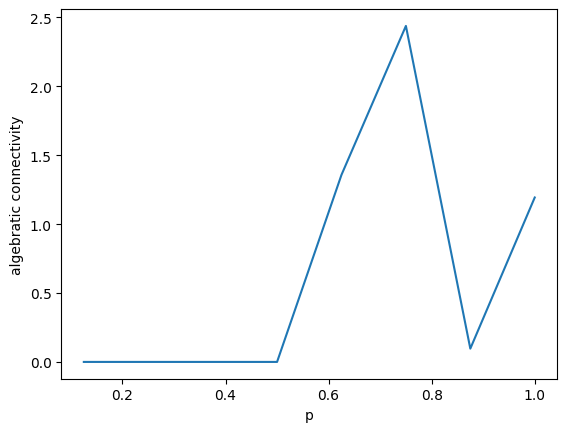

In [91]:
c = rsrg_df['p']
p = rsrg_df['algebratic connectivity']
plt.plot(c, p)

plt.ylabel("algebratic connectivity")
plt.xlabel("p")